In [1]:
import numpy as np, matplotlib.pyplot as plt
from numba import cuda
from funcs import print_gpu_info

Сведения о грфическом процессоре:

In [2]:
cuda.detect()
print('-- GPU INFO --')
print_gpu_info()

Found 1 CUDA devices
id 0    b'NVIDIA GeForce GTX 1650'                              [SUPPORTED]
                      Compute Capability: 7.5
                           PCI Device ID: 0
                              PCI Bus ID: 1
                                    UUID: GPU-20e049a8-7d84-524f-8f21-c3561a0d65e6
                                Watchdog: Enabled
                            Compute Mode: WDDM
             FP32/FP64 Performance Ratio: 32
Summary:
	1/1 devices are supported
-- GPU INFO --
Device Name: NVIDIA GeForce GTX 1650                                                                                                        
Maximum number of multiprocessors: 14
Maximum number of threads per block:       1024
Maximum number of blocks per grid:         1024
Maximum number of threads per grid:  2147483647


In [4]:
# Массив размерностей вектора, используемых при расчете:
vec_size_arr = [1000, 10_000, 100_000, 1_000_000]
# Массив времени исполнения при одном потоке:
t_single_arr = [0.12207647058823543, 1.257719607843142, 12.87104901960784, 122.52653137254904] # ms
t_single_std_arr = [0.001866588398424784, 0.08950207582127781, 1.5421650840362657, 4.117202869762461] # ms
# Массив времени исполнения при распаралелливании на ЦПУ:
t_multi_arr = [6.438550980392165, 6.804394059405943, 8.017800990099007, 42.55079702970296] # ms
t_multi_std_arr = [3.9544194931733387, 4.830173819983276, 3.9932459050894695, 6.209705736247353] # ms
# Массив времени исполнения при распаралелливании на ГПУ:
t_gpu_arr = [1.8407782178217826, 1.8501574257425835, 1.8692811881188078, 1.8996376237623829] # ms
t_gpu_std_arr = [0.04429629223461826, 0.04915476135301175, 0.07737507556946324, 0.05031345282276376] # ms

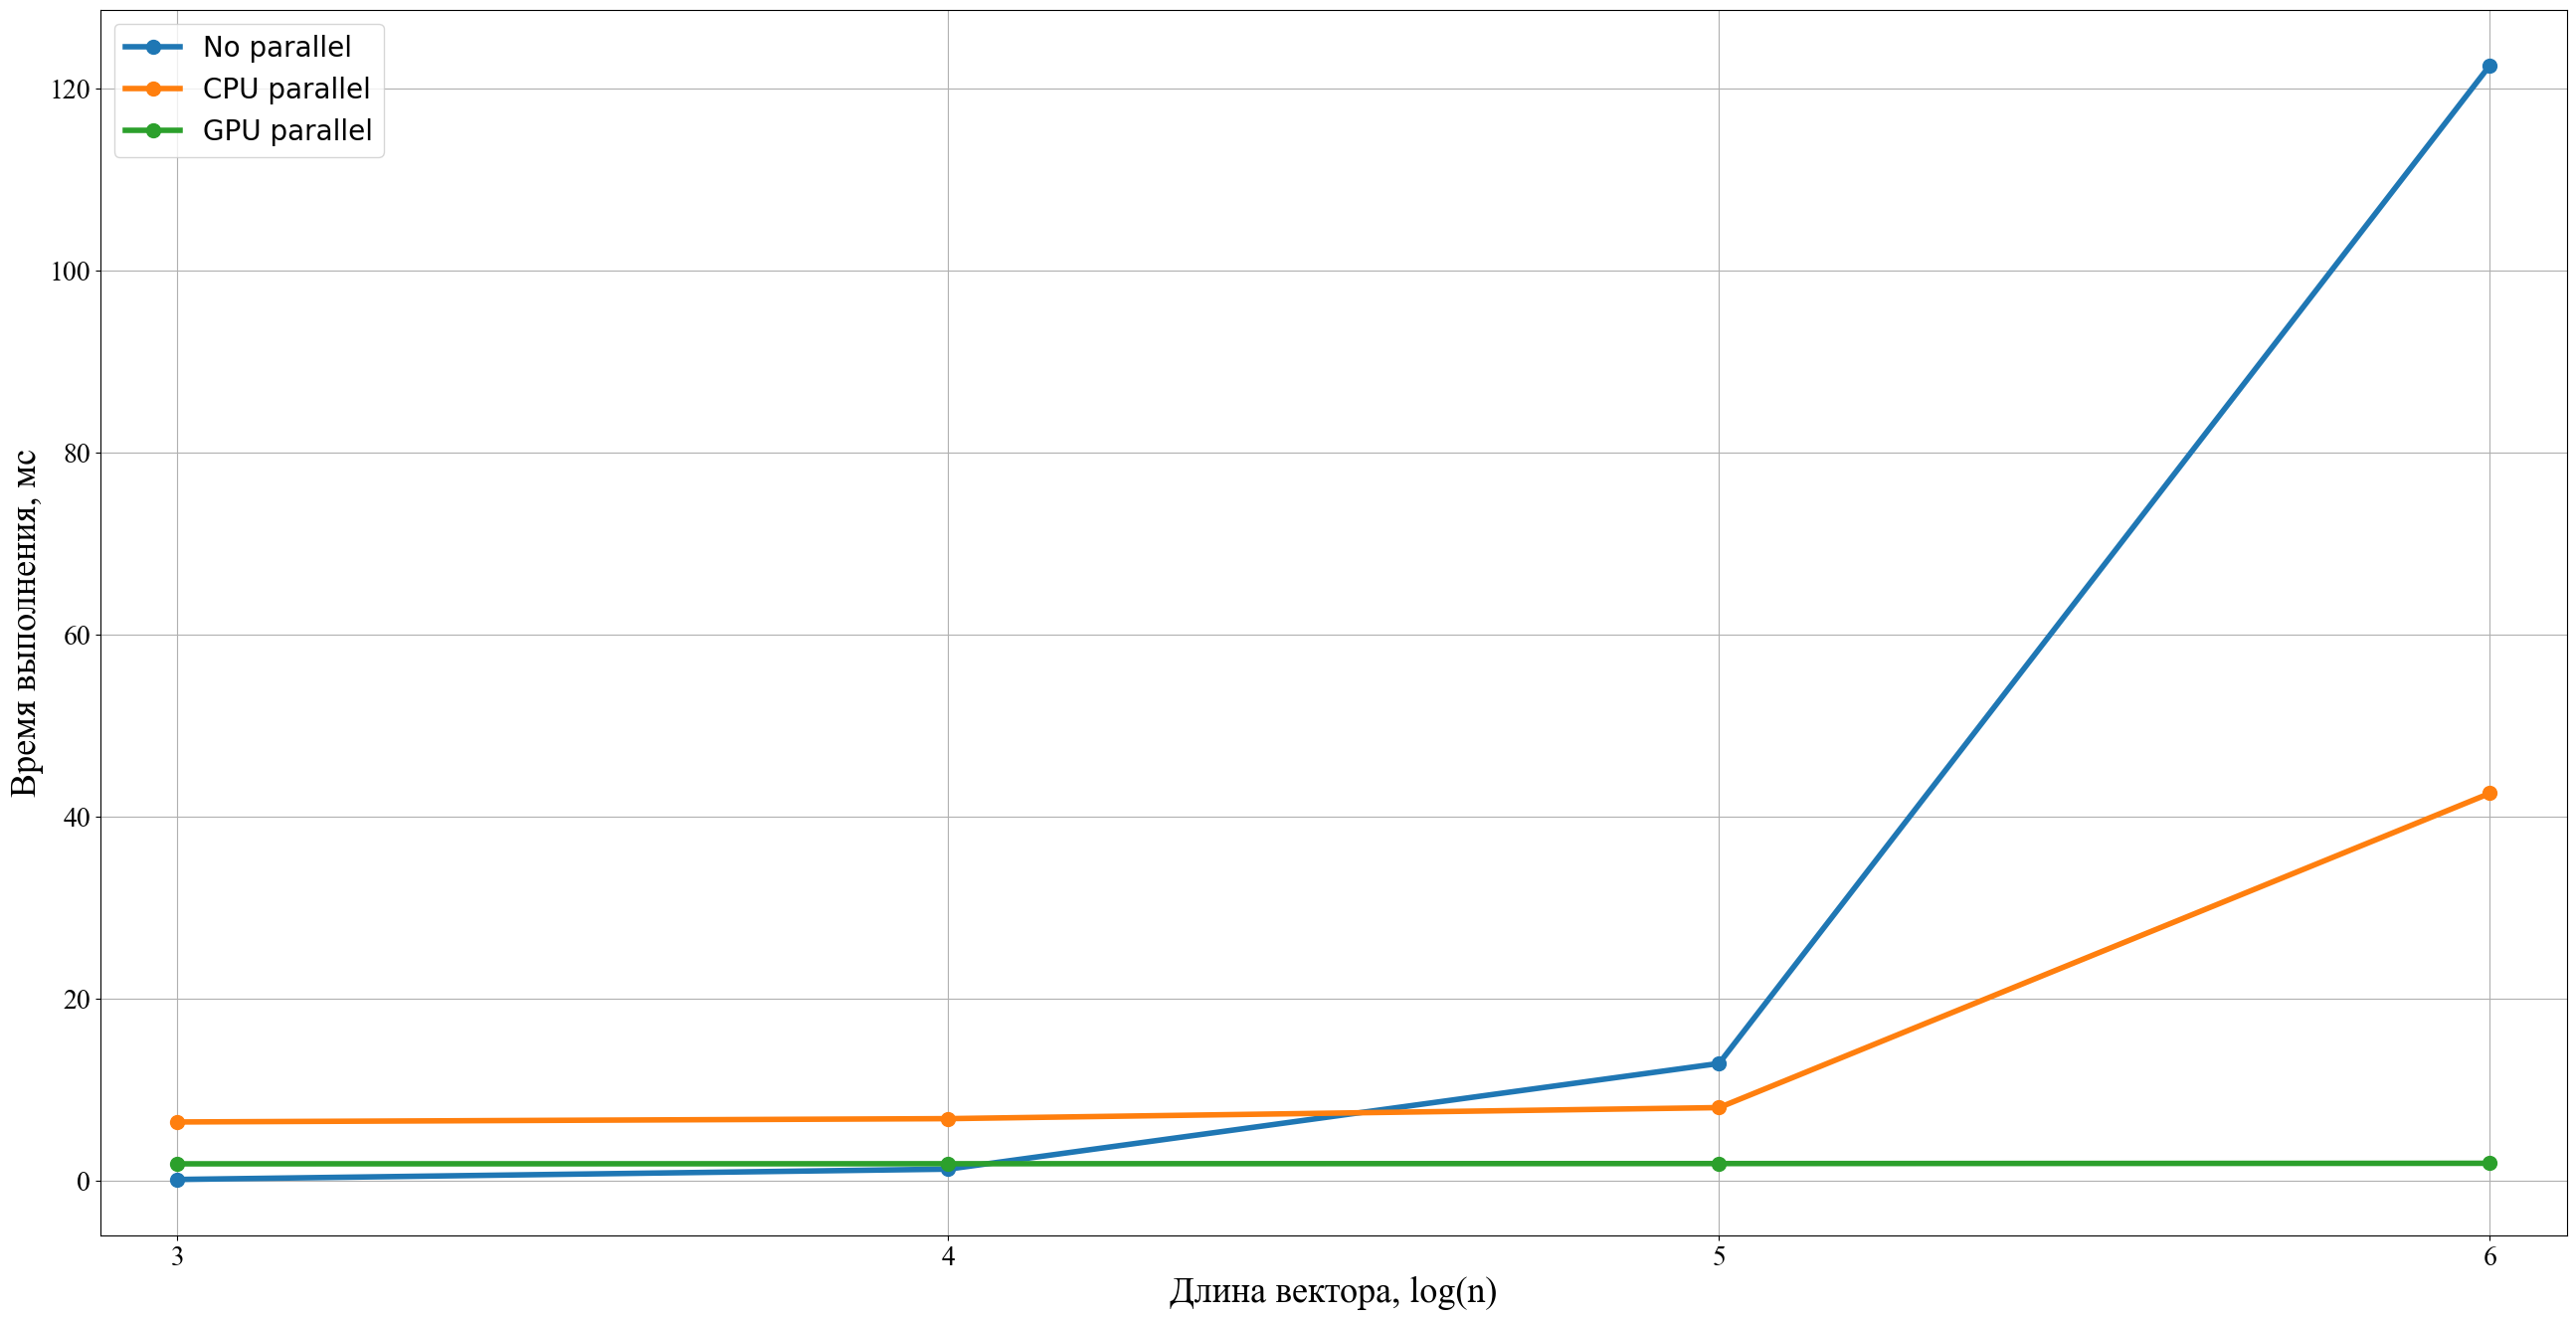

In [31]:
fs = 20; fontname = 'Times New Roman'
plt.figure(figsize=(32, 16))
plt.plot(np.log10(vec_size_arr), t_single_arr, '-o', lw=4, ms=10, label='No parallel')
plt.plot(np.log10(vec_size_arr), t_multi_arr, '-o', lw=4, ms=10, label='CPU parallel')
plt.plot(np.log10(vec_size_arr), t_gpu_arr, '-o', lw=4, ms=10, label='GPU parallel')
plt.xlim([np.log10(vec_size_arr[0]) - 0.1, np.log10(vec_size_arr[-1]) + 0.1])
plt.xlabel('Длина вектора, log(n)', fontname=fontname, fontsize=fs+6)
plt.ylabel('Время выполнения, мс', fontname=fontname, fontsize=fs+6)

plt.xticks(np.log10(vec_size_arr), fontname=fontname, fontsize=fs)
plt.yticks(fontname=fontname, fontsize=fs)
plt.legend(fontsize=fs)
plt.grid()
plt.show()